In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [60]:
df = sns.load_dataset('glue')
df


,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'ERNIE'),
  Text(1, 0, 'T5'),
  Text(2, 0, 'RoBERTa'),
  Text(3, 0, 'BERT'),
  Text(4, 0, 'BiLSTM+ELMo'),
  Text(5, 0, 'BiLSTM+CoVe'),
  Text(6, 0, 'BiLSTM+Attn'),
  Text(7, 0, 'BiLSTM')])

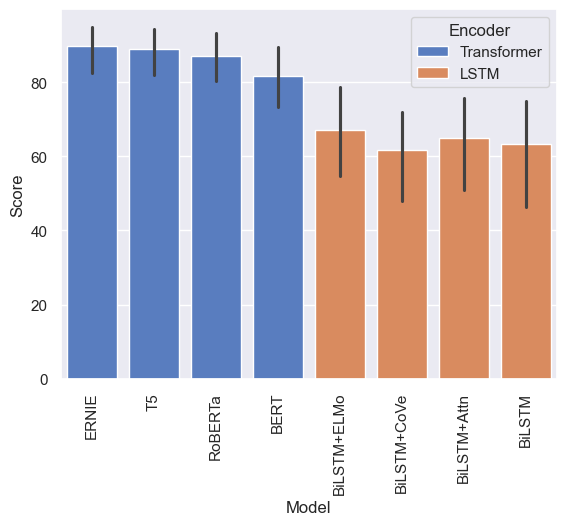

In [67]:
sns.barplot(data=df, x=df['Model'], y=df['Score'], hue='Encoder', palette="muted")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Scatter Plot: score and model')

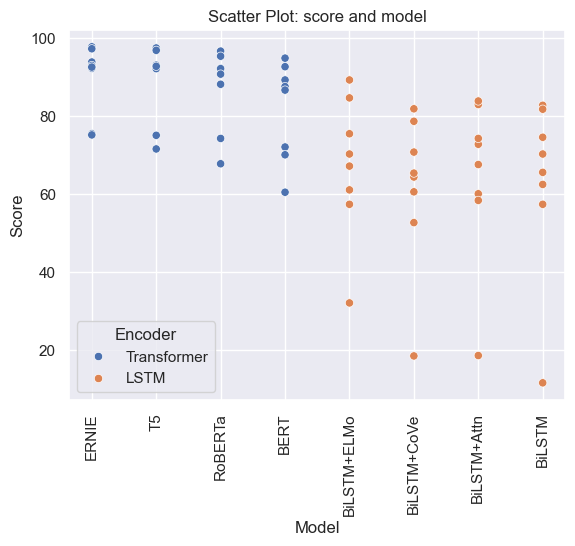

In [73]:
sns.scatterplot(data= df , x=df['Model'], y=df['Score'], hue='Encoder')
plt.xticks(rotation=90)
plt.title('Scatter Plot: score and model')

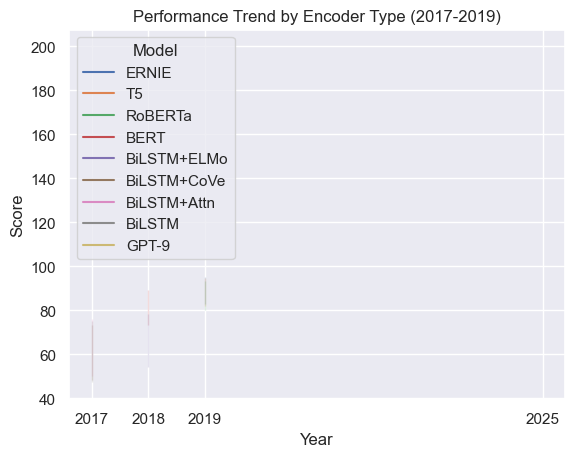

In [99]:
sns.lineplot(data=df, x='Year', y='Score', hue='Model')
plt.xticks(df['Year'].unique())
plt.title('Performance Trend by Encoder Type (2017-2019)')
plt.show()

Text(0.5, 1.0, 'Box Plot: score and model')

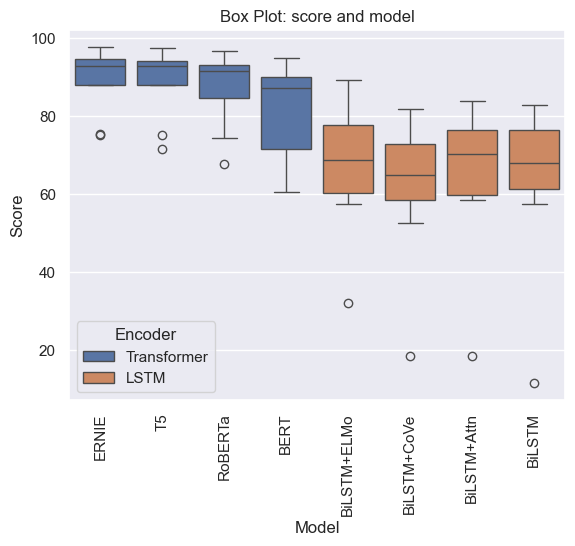

In [87]:
sns.boxplot(data =df, x = df['Model'], y=df['Score'],  hue='Encoder')


plt.xticks(rotation=90)
plt.title('Box Plot: score and model')

In [89]:
stats = df.groupby(['Model', 'Encoder'])['Score'].describe(percentiles=[.25, .75])
# This returns a table with count, mean, 25%, 50%, 75%, and max for every group
print(stats[['25%', '75%']])



                            25%     75%
Model       Encoder                    
BERT        Transformer  71.600  90.150
BiLSTM      LSTM         61.225  76.400
BiLSTM+Attn LSTM         59.675  76.475
BiLSTM+CoVe LSTM         58.625  72.775
BiLSTM+ELMo LSTM         60.175  77.800
ERNIE       Transformer  88.100  94.750
RoBERTa     Transformer  84.725  93.075
T5          Transformer  87.925  94.050


/var/folders/6z/dl2_c4v120j8_v48x2txh5sm0000gn/T/ipykernel_98468/1806567569.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Score', y='Task', palette="Set2")


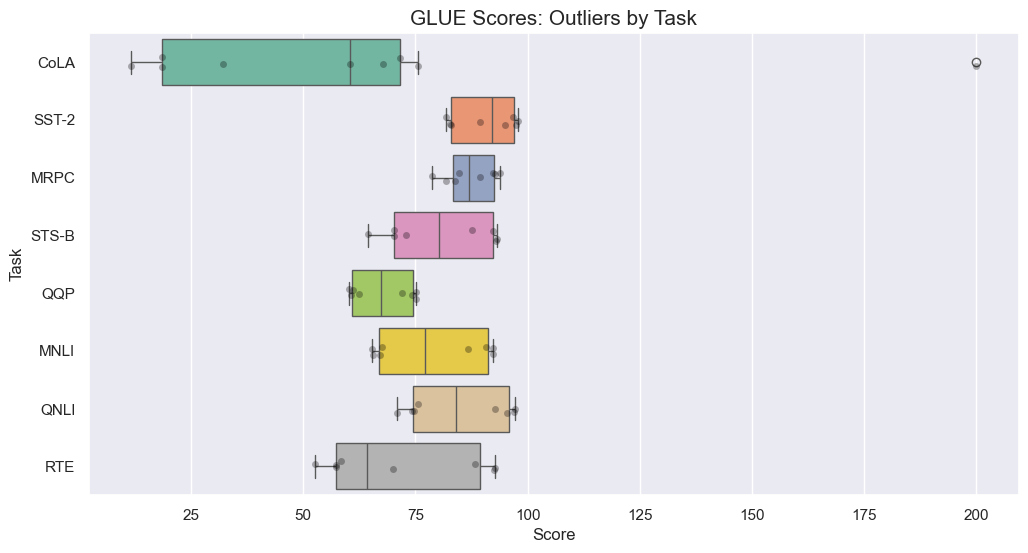

In [94]:
df.groupby(['Model', 'Encoder']).describe()
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load data
df = sns.load_dataset('glue')

# 2. Inject an outlier into a SPECIFIC task (e.g., CoLA)
# Normal CoLA scores are ~30-80. We will add a 200.
new_row = pd.DataFrame({'Model':['GPT-9'], 'Year':[2025], 'Encoder':['Quantum'], 
                        'Task':['CoLA'], 'Score':[200.0]})
df = pd.concat([df, new_row], ignore_index=True)

# 3. Plot with BOTH X and Y
plt.figure(figsize=(12, 6))

# X = Numerical Data (The Scores)
# Y = Categorical Data (The Tasks)
sns.boxplot(data=df, x='Score', y='Task', palette="Set2")

# Adding a stripplot on top helps see the individual "dot" for the outlier
sns.stripplot(data=df, x='Score', y='Task', color="black", alpha=0.3)

plt.title("GLUE Scores: Outliers by Task", fontsize=15)
plt.show()


In [114]:
tips = sns.load_dataset("tips")
tips.to_csv('tips.csv', index=False)

In [113]:
tips.groupby('day')['tip'].describe()

/var/folders/6z/dl2_c4v120j8_v48x2txh5sm0000gn/T/ipykernel_98468/2567271825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip'].describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50


<Axes: xlabel='day', ylabel='tip'>

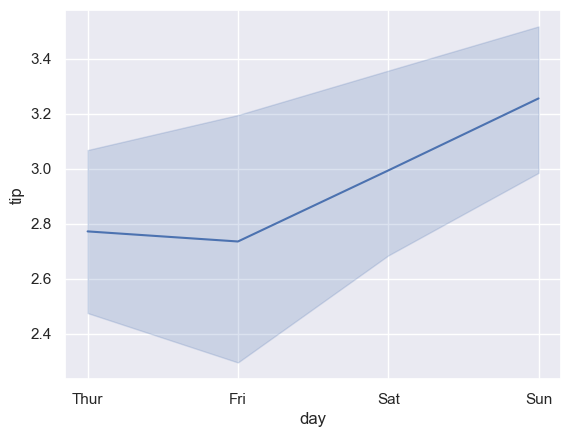

In [107]:
sns.lineplot(data=tips , x= tips['day'] , y=tips['tip'])